# Simple 10-class classification

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Suppress warkings (gets rid of some type-conversion warnings)
warnings.filterwarnings("ignore")
%matplotlib inline

C:\Users\Mijael\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Generate some dummy data

In [2]:
classes = 10
data = np.random.random((1000, 100))
labels = np.random.randint(classes, size=(1000, 1))

### (Optional) Visualization of the data
This is not part of the Keras example, but it helps to understand what we are trying to do.

In [3]:
# Plot a 2D representation of the data, using t-SNE
from sklearn.manifold import TSNE
data_viz = TSNE(n_components=2).fit_transform(data)
print("Data dimensions after reduction: {}".format(data_viz.shape))

Data dimensions after reduction: (1000, 2)


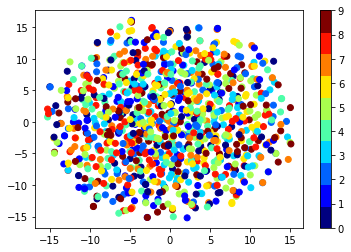

In [4]:
plt.scatter(data_viz[:,0], data_viz[:,1], c=labels, cmap=plt.cm.get_cmap("jet", classes))
plt.colorbar(ticks=range(classes))

#### Let's see what each example looks like
We can think of them as the images of "digits." We will actually train character recognition in future tutorials.

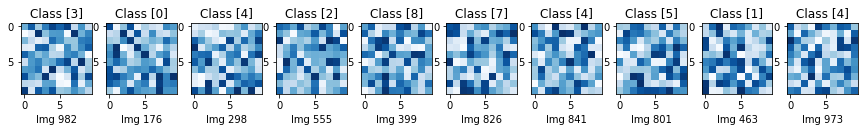

In [5]:
sampleSize = 10
samples = np.random.permutation(data.shape[0])[0:sampleSize].tolist()
fig=plt.figure(figsize=(15, 8))

for i in range(1, sampleSize+1):
    fig.add_subplot(1, sampleSize, i)
    plt.imshow(np.reshape(data[samples[i-1],:], (10,10)), interpolation='nearest', cmap="Blues")
    plt.title('Class {}'.format(labels[samples[i-1]]))
    plt.xlabel("Img {}".format(samples[i-1]))

## Finally, let's use Keras

### Create the model

In [6]:
# For a single-input model with 10 classes (categorical classification):
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(classes, activation='softmax'))

### Compile the model

In [7]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


### Transform labels (i.e., the outputs), to the shape expected by the model

In [8]:
# Convert labels to categorical one-hot encoding
one_hot_labels = keras.utils.to_categorical(labels, num_classes=classes)

# Optional: visualize the label transformation
rIdx = np.random.randint(0, labels.shape[0])
print("Label shapes before: {}".format(labels.shape))
print("\tLabel at random index {}:\n\t{}\n".format(rIdx, labels[rIdx]))

print("Label shapes after: {}".format(one_hot_labels.shape))
print("\tOne-hot encoded label at random index {} (same as above):\n\t{}\n".format(rIdx, one_hot_labels[rIdx, :]))
print("(Pos.)\t{}".format(np.array(range(0,10),dtype="float")))

Label shapes before: (1000, 1)
	Label at random index 390:
	[6]

Label shapes after: (1000, 10)
	One-hot encoded label at random index 390 (same as above):
	[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

(Pos.)	[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


### Train the model
Note how the loss decreases, while the accuracy increases, as the training goes through more and more epochs.

In [9]:
# Train the model, iterating on the data in batches of 32 samples
model.fit(data, one_hot_labels, epochs=250, batch_size=32, verbose=2)

Epoch 1/250
 - 0s - loss: 2.3491 - acc: 0.1010
Epoch 2/250
 - 0s - loss: 2.3080 - acc: 0.1090
Epoch 3/250
 - 0s - loss: 2.2977 - acc: 0.1220
Epoch 4/250
 - 0s - loss: 2.2875 - acc: 0.1280
Epoch 5/250
 - 0s - loss: 2.2776 - acc: 0.1350
Epoch 6/250
 - 0s - loss: 2.2699 - acc: 0.1420
Epoch 7/250
 - 0s - loss: 2.2624 - acc: 0.1500
Epoch 8/250
 - 0s - loss: 2.2552 - acc: 0.1500
Epoch 9/250
 - 0s - loss: 2.2482 - acc: 0.1520
Epoch 10/250
 - 0s - loss: 2.2403 - acc: 0.1590
Epoch 11/250
 - 0s - loss: 2.2330 - acc: 0.1740
Epoch 12/250
 - 0s - loss: 2.2247 - acc: 0.1880
Epoch 13/250
 - 0s - loss: 2.2147 - acc: 0.1770
Epoch 14/250
 - 0s - loss: 2.2083 - acc: 0.1910
Epoch 15/250
 - 0s - loss: 2.2009 - acc: 0.1880
Epoch 16/250
 - 0s - loss: 2.1934 - acc: 0.1990
Epoch 17/250
 - 0s - loss: 2.1821 - acc: 0.2110
Epoch 18/250
 - 0s - loss: 2.1738 - acc: 0.2120
Epoch 19/250
 - 0s - loss: 2.1652 - acc: 0.2220
Epoch 20/250
 - 0s - loss: 2.1573 - acc: 0.2300
Epoch 21/250
 - 0s - loss: 2.1484 - acc: 0.2230
E

Epoch 171/250
 - 0s - loss: 1.0467 - acc: 0.6870
Epoch 172/250
 - 0s - loss: 1.0424 - acc: 0.6940
Epoch 173/250
 - 0s - loss: 1.0382 - acc: 0.6950
Epoch 174/250
 - 0s - loss: 1.0329 - acc: 0.6990
Epoch 175/250
 - 0s - loss: 1.0256 - acc: 0.7030
Epoch 176/250
 - 0s - loss: 1.0237 - acc: 0.6990
Epoch 177/250
 - 0s - loss: 1.0173 - acc: 0.7010
Epoch 178/250
 - 0s - loss: 1.0146 - acc: 0.7050
Epoch 179/250
 - 0s - loss: 1.0067 - acc: 0.7090
Epoch 180/250
 - 0s - loss: 1.0005 - acc: 0.7000
Epoch 181/250
 - 0s - loss: 1.0007 - acc: 0.7130
Epoch 182/250
 - 0s - loss: 0.9873 - acc: 0.7130
Epoch 183/250
 - 0s - loss: 0.9871 - acc: 0.7130
Epoch 184/250
 - 0s - loss: 0.9811 - acc: 0.7230
Epoch 185/250
 - 0s - loss: 0.9764 - acc: 0.7080
Epoch 186/250
 - 0s - loss: 0.9714 - acc: 0.7130
Epoch 187/250
 - 0s - loss: 0.9677 - acc: 0.7180
Epoch 188/250
 - 0s - loss: 0.9621 - acc: 0.7250
Epoch 189/250
 - 0s - loss: 0.9573 - acc: 0.7290
Epoch 190/250
 - 0s - loss: 0.9509 - acc: 0.7190
Epoch 191/250
 - 0s 

5/5 [==============================] - 0s 3ms/step


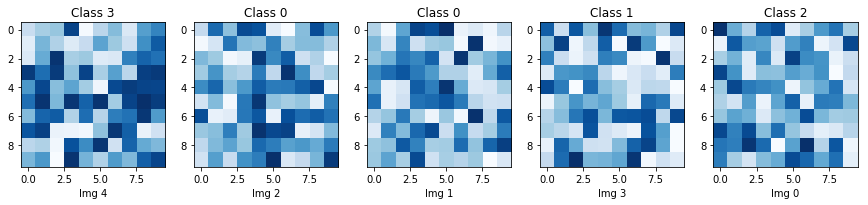

In [10]:
predSetSize = 5
predData = np.random.random((predSetSize, 100))
samples = np.random.permutation(predData.shape[0])[0:predSetSize].tolist()
fig=plt.figure(figsize=(15, 8))

results = np.round(model.predict(predData, verbose=1), decimals=2)
resultLabels = np.argmax(results, axis=0)

for i in range(1, predSetSize+1):
    fig.add_subplot(1, predSetSize, i)
    plt.imshow(np.reshape(predData[samples[i-1],:], (10,10)), interpolation='nearest', cmap="Blues")
    plt.title('Class {}'.format(resultLabels[samples[i-1]]))
    plt.xlabel("Img {}".format(samples[i-1]))



## Conclusions
This example is still abstract (i.e., we used random data), but it shows the general workflow. In the next tutorial, we will apply this to a meaningful dataset.